Imports

In [1]:
# Imports
from utils import *
import numpy as np
import matplotlib.pyplot as plt


Load dataset

In [2]:
# Import data
takens_data = load_dataset("datasets/takens_1.txt", sort=True)

Plot dataset

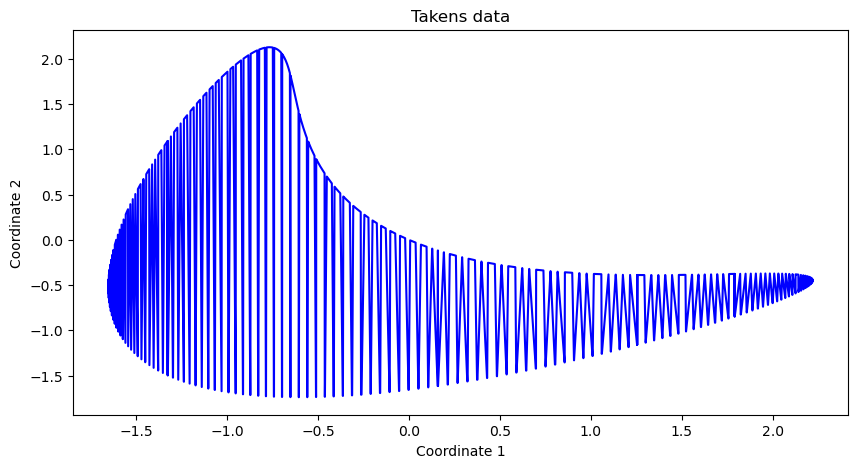

In [3]:
#plot data
plt.figure(figsize=(10, 5))
plt.plot(takens_data[:, 0], takens_data[:, 1], 'b-')
plt.xlabel('Coordinate 1')
plt.ylabel('Coordinate 2')
plt.title('Takens data')
plt.savefig('takens_data.png')
plt.show()

Plot first coordinate against time

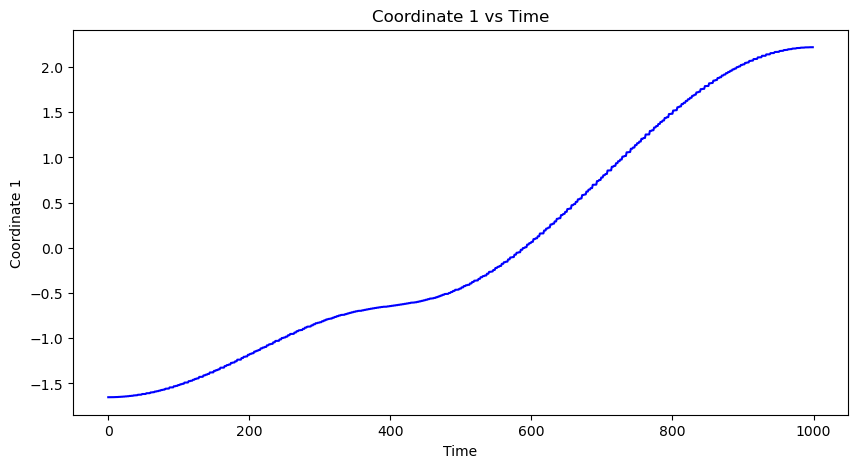

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(takens_data.shape[0]), takens_data[:, 0], 'b-')
plt.xlabel('Time')
plt.ylabel('Coordinate 1')
plt.title('Coordinate 1 vs Time')
plt.savefig('takens_data_time.png')
plt.show()

Plot the second coordinate against the line number (time)

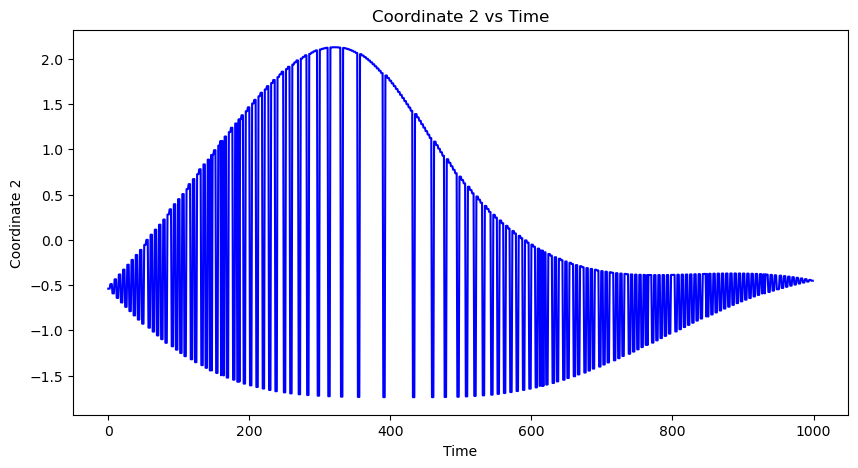

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(takens_data.shape[0]), takens_data[:, 1], 'b-')
plt.xlabel('Time')
plt.ylabel('Coordinate 2')
plt.title('Coordinate 2 vs Time')
plt.savefig('takens_data_time2.png')
plt.show()

Plot Coordinate 1 vs delayed coordinate 1

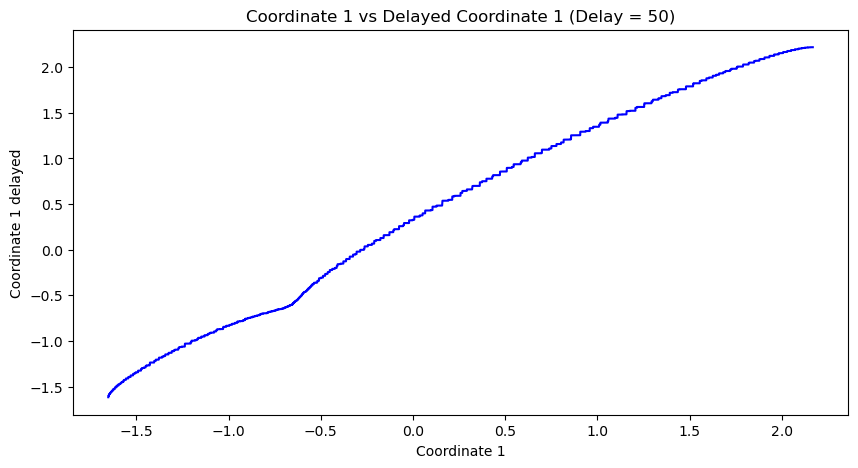

In [6]:
# Choose a delay
delay = 50 

# Create a delayed version of the first coordinate
coordinate1_delayed = np.roll(takens_data[:, 0], -delay)

# Plot the first coordinate against its delayed version, excluding the last delay elements
plt.figure(figsize=(10, 5))
plt.plot(takens_data[:-delay, 0], coordinate1_delayed[:-delay], 'b-')
plt.xlabel('Coordinate 1')
plt.ylabel('Coordinate 1 delayed')
plt.title('Coordinate 1 vs Delayed Coordinate 1 (Delay = {})'.format(delay))
plt.savefig(f'takens_data_delay_{delay}.png')
plt.show()

3D plot of the embedding

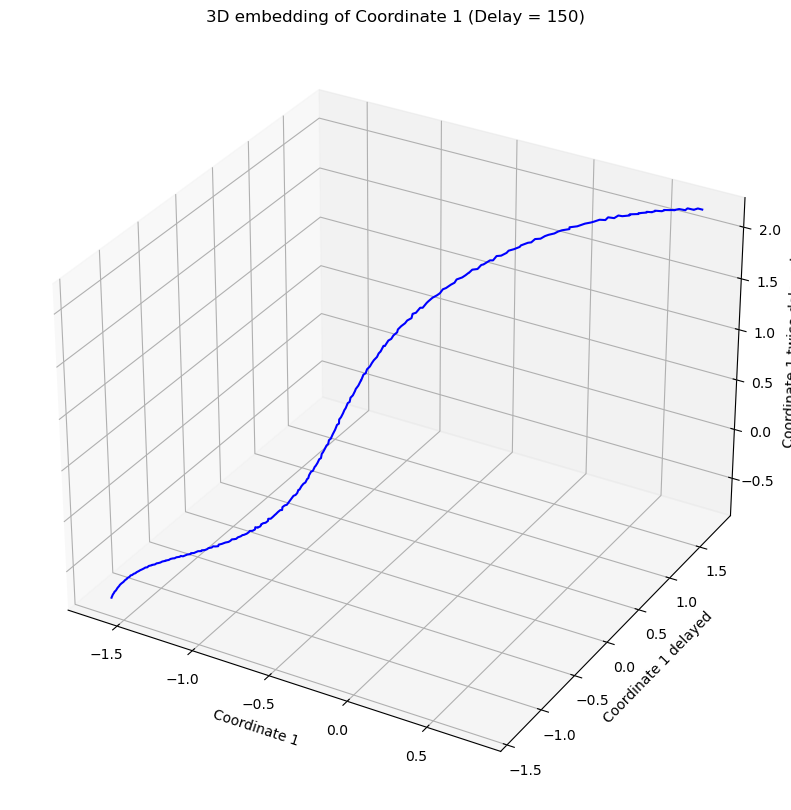

In [7]:
# Choose a delay
delay = 150
delay2 = delay*2

# Create delayed versions of the first coordinate
coordinate1_delayed = np.roll(takens_data[:, 0], -delay)
coordinate2_delayed = np.roll(takens_data[:, 0], -delay2)

# Create the new trajectory in 3D
new_trajectory = np.column_stack([takens_data[:-delay2, 0], coordinate1_delayed[:-delay2], coordinate2_delayed[:-delay2]])

# Plot the new trajectory
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(new_trajectory[:, 0], new_trajectory[:, 1], new_trajectory[:, 2], 'b-')
ax.set_xlabel('Coordinate 1')
ax.set_ylabel('Coordinate 1 delayed')
ax.set_zlabel('Coordinate 1 twice delayed')
plt.title('3D embedding of Coordinate 1 (Delay = {})'.format(delay))
plt.savefig(f'takens_data_3D_{delay}.png')
plt.show()

Approximate Lorenz attractor using Takens theorem

Best delay: 7


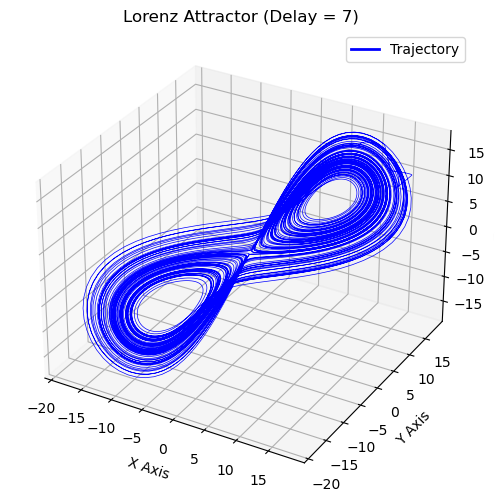

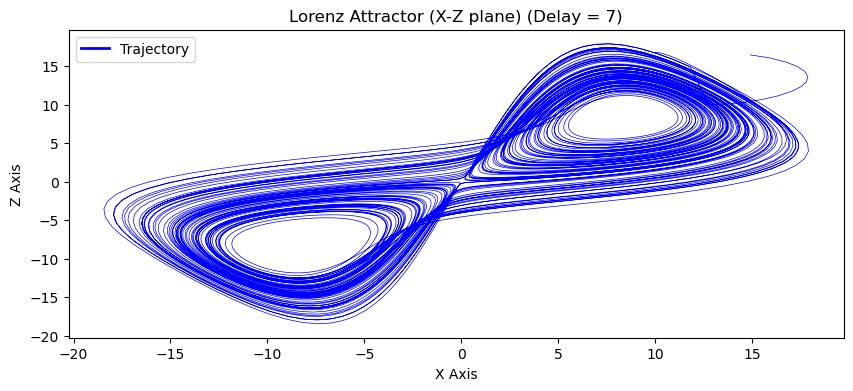

In [8]:
# Simulate the Lorenz system
initial_values = [10, 10, 10]
Tend = 100
dt = 0.01
trajectory = simulate_lorenz(initial_values, Tend, dt)

# Extract the x-coordinate
x = trajectory[:, 0]

# Choose the best delay
delay, distances =  best_delay(trajectory, x)
print('Best delay:', delay)

# Create delayed versions of the x-coordinate
x_delayed1 = np.roll(x, -delay)
x_delayed2 = np.roll(x, -2*delay)

# Create the new trajectory
new_trajectory = np.column_stack((x, x_delayed1, x_delayed2))

# Plot the new trajectory using the selected function
plot_trajectory_lorenz(new_trajectory, delay, linewidth=0.5)
plot_trajectory_lorenz_xz(new_trajectory, delay, linewidth=0.5)

Plot distances between approximations for each delay value

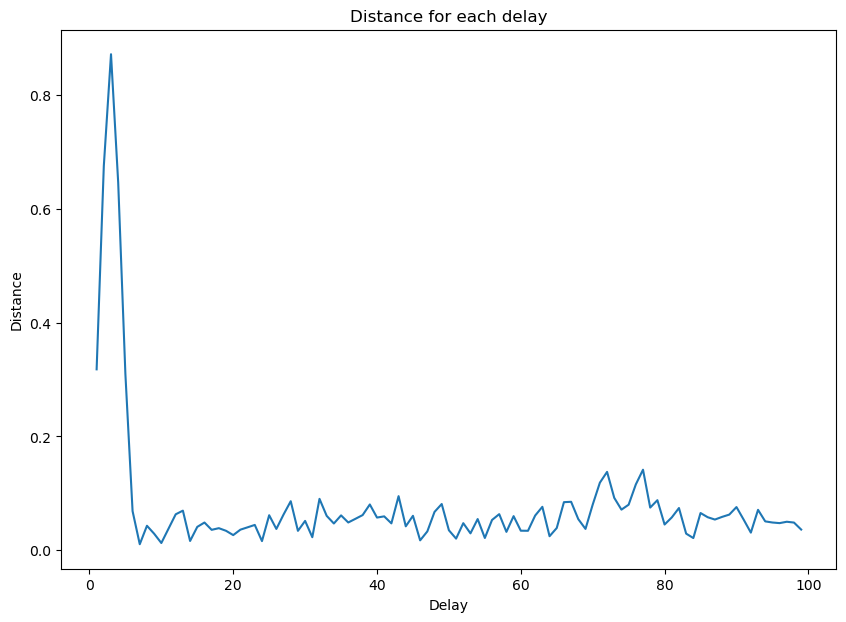

In [9]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, 100), distances)
plt.xlabel('Delay')
plt.ylabel('Distance')
plt.title('Distance for each delay')
plt.savefig('distance.png')
plt.show()

Compare original trajectory and the approximated one

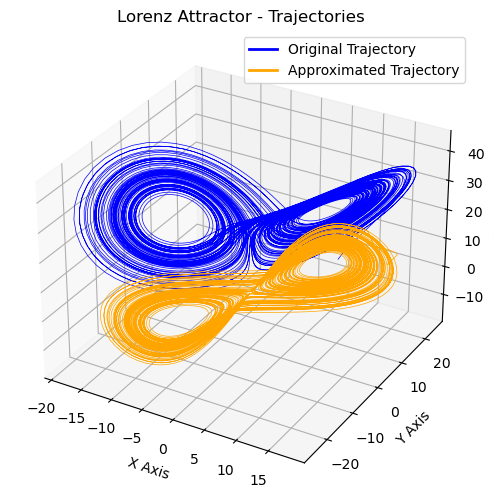

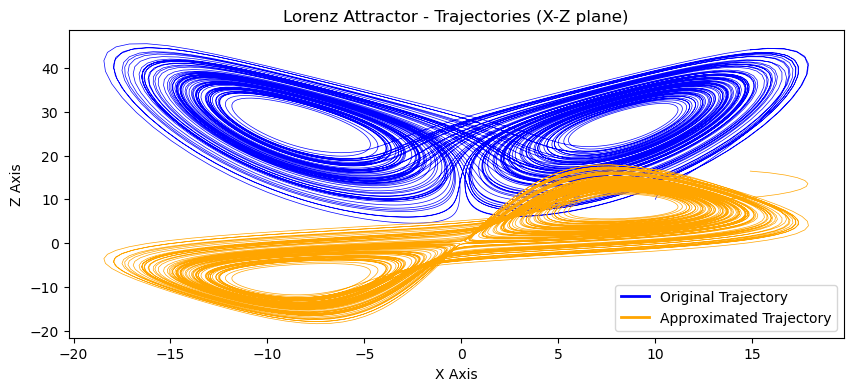

In [10]:
plot_multrajectories_lorenz(trajectory, new_trajectory, linewidth=0.5)
plot_multrajectories_lorenz_xz(trajectory, new_trajectory, linewidth=0.5)

Approximate Lorenz attractor using z-coordinate

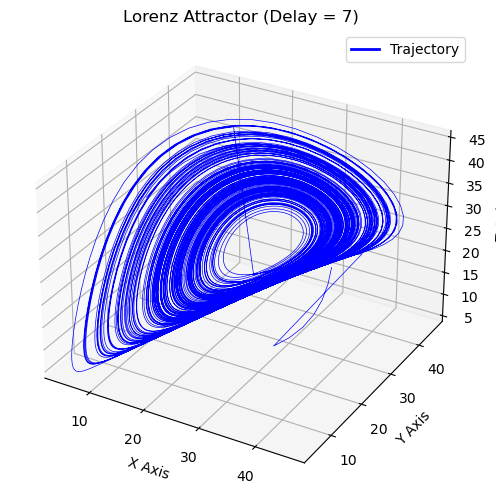

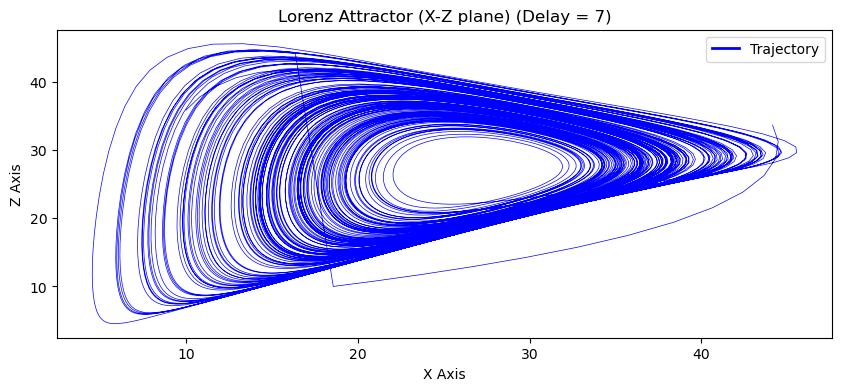

In [11]:
initial_values = [10, 10, 10]
Tend = 100
dt = 0.01
trajectory = simulate_lorenz(initial_values, Tend, dt)

# Extract the z-coordinate
z = trajectory[:, 2]

# Choose a delay
delay = 7

# Create delayed versions of the z-coordinate
z_delayed1 = np.roll(z, -delay)
z_delayed2 = np.roll(z, -2*delay)

# Create the new trajectory
new_trajectory = np.column_stack((z, z_delayed1, z_delayed2))

# Plot the new trajectory using the selected function
plot_trajectory_lorenz(new_trajectory, delay, linewidth=0.5)
plot_trajectory_lorenz_xz(new_trajectory, delay, linewidth=0.5)